In [1]:
import pycisTopic
pycisTopic.__version__

'0.1.dev300+g7494158'

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
import pickle
import pandas as pd

In [4]:
import os
wdir = '/user/leuven/330/vsc33042/fderop/data/20211027_hca_benchmark_full_merged/'
os.chdir( wdir )

In [5]:
import glob
from collections import OrderedDict

# open cto

In [6]:
# load objects into dict:
f_cto_dir = 'ctos'
key = 'full_merged'
cistopic_obj_dict = {}
f_out = os.path.join(wdir, f_cto_dir, key + '__cistopic_obj.pkl')
infile = open(f_out, 'rb')
tmp_cto = pickle.load(infile)
infile.close()
cistopic_obj_dict[key] = tmp_cto
print(f"Loaded {key}")

Loaded full_merged


### Read in LDA/mallett models

In [7]:
from pycisTopic.lda_models import evaluate_models
import matplotlib.pyplot as plt

In [8]:
f_mod_dir = 'models__screen__mallet_full'
n_iter = 200
models_dict = {}
for key in ['full_merged']:
    f_mod =os.path.join(wdir, f_mod_dir, key + '__models_' + str(n_iter) + '_iter.pkl')
    if(os.path.isfile(f_mod)):
        with open(f_mod, 'rb') as f:
            models_dict[key] = pickle.load(f)
        print(f"Loaded {key}")
    else:
        print(f"no such file {f_mod}")

Loaded full_merged


In [9]:
models_dict[key]

In [10]:
for key in models_dict.keys():
    model=evaluate_models(models_dict[key],
                         select_model=50, 
                         return_model=True, 
                         metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
                         plot=False, # disabled since we only test one model here
                         plot_metrics=False
                         )
    cistopic_obj_dict[key].add_LDA_model(model)

# load metadata from the single samples

In [11]:
keys = list(cistopic_obj_dict['full_merged'].cell_data['sample_id'].unique())

In [12]:
metadata_dict = {}
for key in keys:
    f_meta = os.path.join('/lustre1/project/stg_00002/lcb/fderop/data/20211008_hca_benchmark_full_singles/pycistopic_screen',key+'_cell_data.tsv')
    metadata_dict[key] = pd.read_csv(f_meta, index_col=0, header=0, sep='\t')

In [13]:
metadata_dict.keys()

dict_keys(['Broad_1', 'Broad_2', 'Broad_mito_1', 'Broad_mito_2', 'CNAG_1', 'CNAG_2', 'Sanger_1', 'Sanger_2', 'Stanford_1', 'Stanford_2', 'VIB_1', 'VIB_2', 'VIB_Hydrop_1', 'VIB_Hydrop_2', 's3atac'])

In [14]:
df_meta = pd.DataFrame()
for key in metadata_dict.keys():
    df_meta = pd.concat([df_meta, metadata_dict[key]], axis=0)

In [15]:
cistopic_obj_dict['full_merged'].cell_data['seurat_cell_type'] = df_meta['seurat_cell_type']
cistopic_obj_dict['full_merged'].cell_data['consensus_cell_type'] = df_meta['consensus_cell_type']

## Visualizations

In [16]:
from pycisTopic.clust_vis import find_clusters, run_umap, run_tsne, plot_metadata, plot_topic

In [17]:
cistopic_obj_dict['full_merged'].selected_model

In [18]:
for key in cistopic_obj_dict.keys():
    find_clusters(cistopic_obj_dict[key],
              target  = 'cell',
              k = 10,
              res = [0.6, 0.8, 1.0, 1.2],
              prefix = 'pycisTopic_')
    cistopic_obj_dict[key].projections['cell'] = {}
    run_umap(cistopic_obj_dict[key], target = 'cell')
    #run_tsne(cistopic_obj_dict[key], target = 'cell')

2021-11-09 12:00:48,778 cisTopic     INFO     Finding neighbours
2021-11-09 12:01:40,533 cisTopic     INFO     Running UMAP


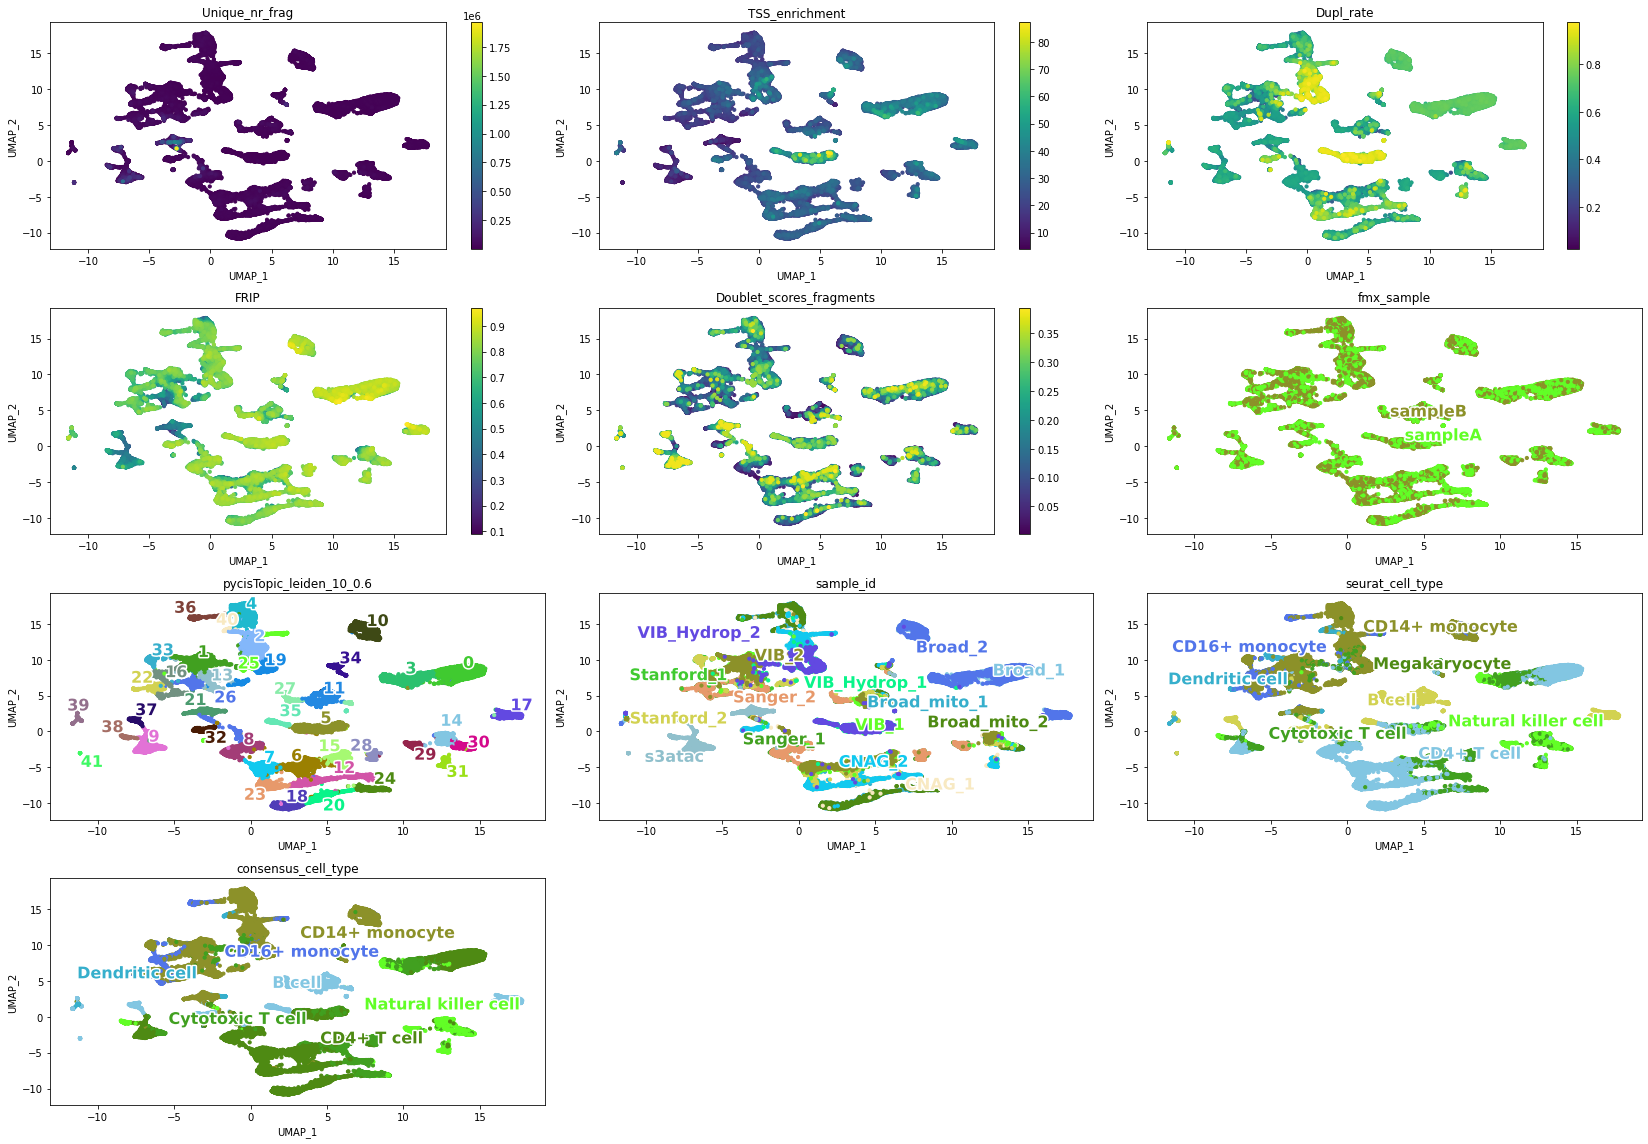

In [19]:
plot_metadata(cistopic_obj_dict['full_merged'],
              reduction_name='UMAP',
              variables=['Unique_nr_frag', 'TSS_enrichment', 'Dupl_rate', 'FRIP',
                             'Doublet_scores_fragments', 'fmx_sample', 'pycisTopic_leiden_10_0.6', 'sample_id', 'seurat_cell_type', 'consensus_cell_type'],
              target='cell',
              num_columns=3,
              text_size=16,
              dot_size=10,
              figsize=(23,16),
             )

## Batch effect correction with Harmony

In [20]:
from pycisTopic.clust_vis import harmony

In [21]:
harmony(cistopic_obj_dict['full_merged'],
        'sample_id',
        random_state=555,
        max_iter_harmony=20
       )

2021-11-09 12:04:21,550 - harmonypy - INFO - Iteration 1 of 20


2021-11-09 12:04:21,550 harmonypy    INFO     Iteration 1 of 20


2021-11-09 12:05:26,130 - harmonypy - INFO - Iteration 2 of 20


2021-11-09 12:05:26,130 harmonypy    INFO     Iteration 2 of 20


2021-11-09 12:06:33,167 - harmonypy - INFO - Iteration 3 of 20


2021-11-09 12:06:33,167 harmonypy    INFO     Iteration 3 of 20


2021-11-09 12:07:44,252 - harmonypy - INFO - Iteration 4 of 20


2021-11-09 12:07:44,252 harmonypy    INFO     Iteration 4 of 20


2021-11-09 12:08:23,955 - harmonypy - INFO - Iteration 5 of 20


2021-11-09 12:08:23,955 harmonypy    INFO     Iteration 5 of 20


2021-11-09 12:09:28,965 - harmonypy - INFO - Iteration 6 of 20


2021-11-09 12:09:28,965 harmonypy    INFO     Iteration 6 of 20


2021-11-09 12:10:05,654 - harmonypy - INFO - Iteration 7 of 20


2021-11-09 12:10:05,654 harmonypy    INFO     Iteration 7 of 20


2021-11-09 12:10:31,266 - harmonypy - INFO - Iteration 8 of 20


2021-11-09 12:10:31,266 harmonypy    INFO     Iteration 8 of 20


2021-11-09 12:10:54,239 - harmonypy - INFO - Iteration 9 of 20


2021-11-09 12:10:54,239 harmonypy    INFO     Iteration 9 of 20


2021-11-09 12:11:18,666 - harmonypy - INFO - Iteration 10 of 20


2021-11-09 12:11:18,666 harmonypy    INFO     Iteration 10 of 20


2021-11-09 12:11:39,146 - harmonypy - INFO - Iteration 11 of 20


2021-11-09 12:11:39,146 harmonypy    INFO     Iteration 11 of 20


2021-11-09 12:11:59,655 - harmonypy - INFO - Converged after 11 iterations


2021-11-09 12:11:59,655 harmonypy    INFO     Converged after 11 iterations


In [22]:
run_umap(cistopic_obj_dict['full_merged'], target = 'cell', reduction_name='UMAP_harmony', harmony=True)
#run_tsne(cistopic_obj_dict['merged'], target = 'cell', reduction_name='tSNE_harmony', harmony=True)

2021-11-09 12:11:59,854 cisTopic     INFO     Running UMAP


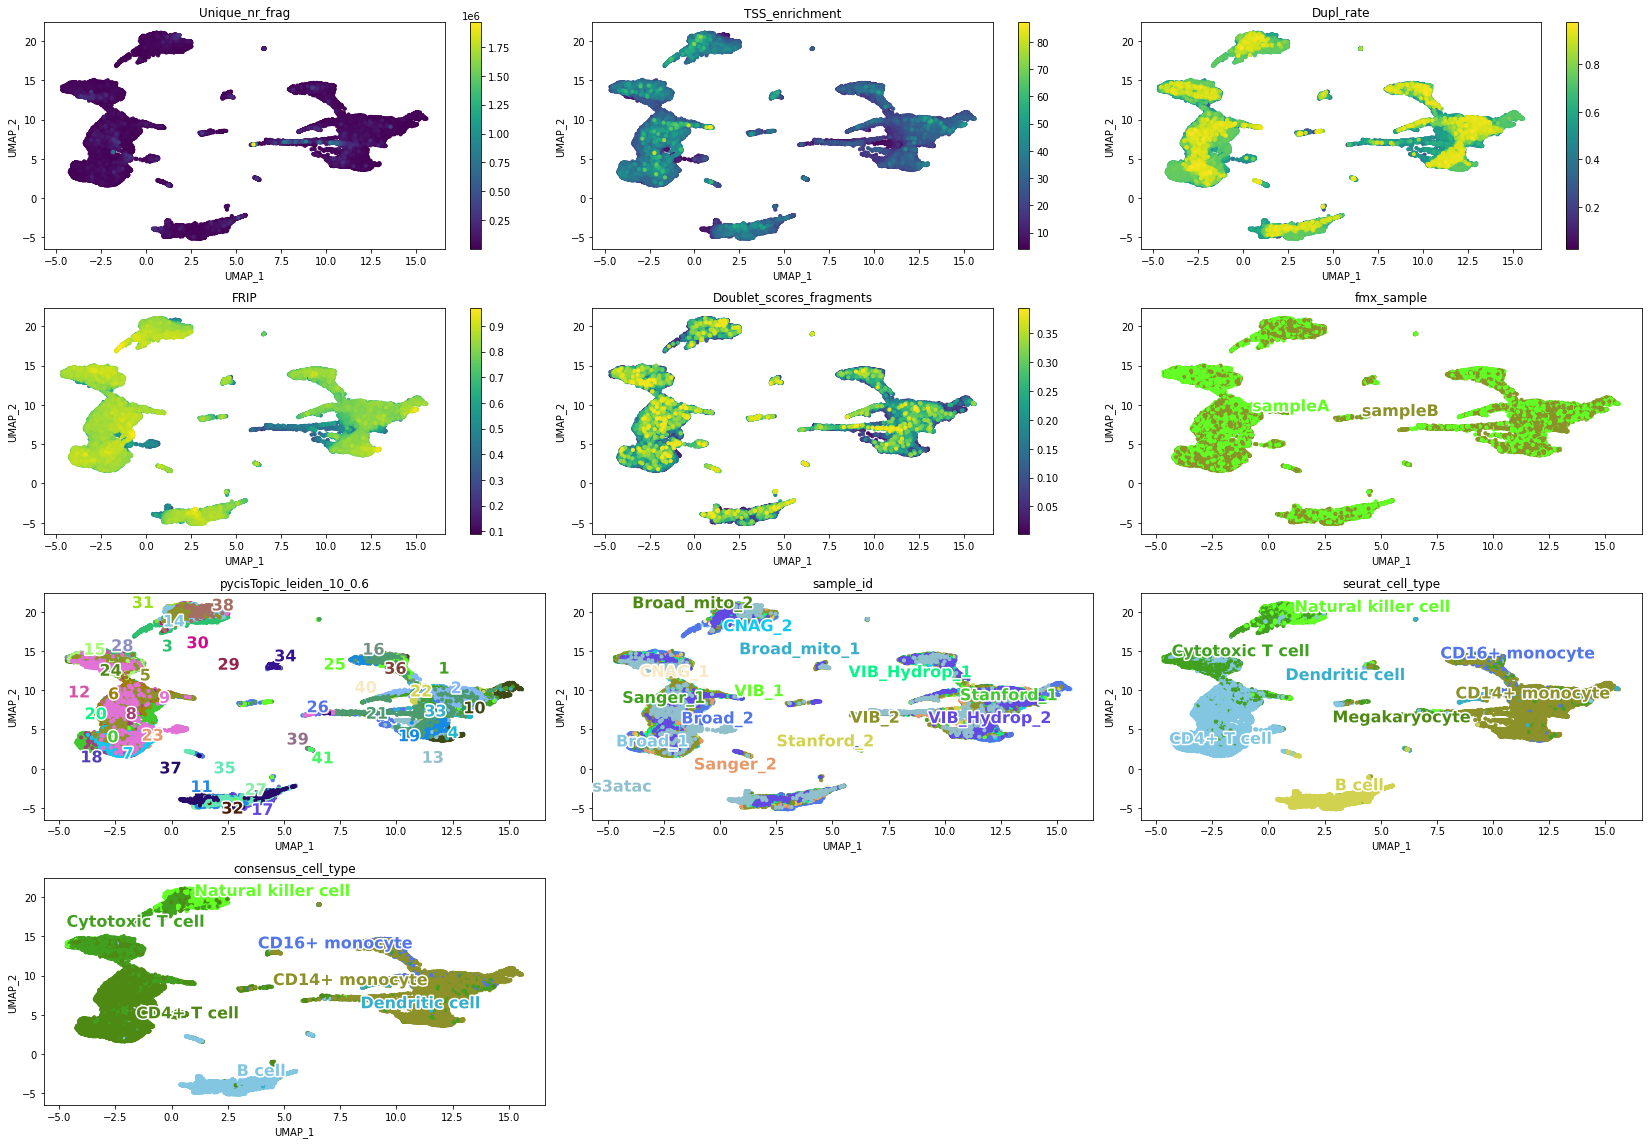

In [23]:
plot_metadata(cistopic_obj_dict['full_merged'],
              reduction_name='UMAP_harmony',
              variables=['Unique_nr_frag', 'TSS_enrichment', 'Dupl_rate', 'FRIP',
                             'Doublet_scores_fragments', 'fmx_sample', 'pycisTopic_leiden_10_0.6', 'sample_id', 'seurat_cell_type', 'consensus_cell_type'],
              target='cell',
              num_columns=3,
              text_size=16,
              dot_size=10,
              figsize=(23,16),
             )

UMAP without batch effect correction


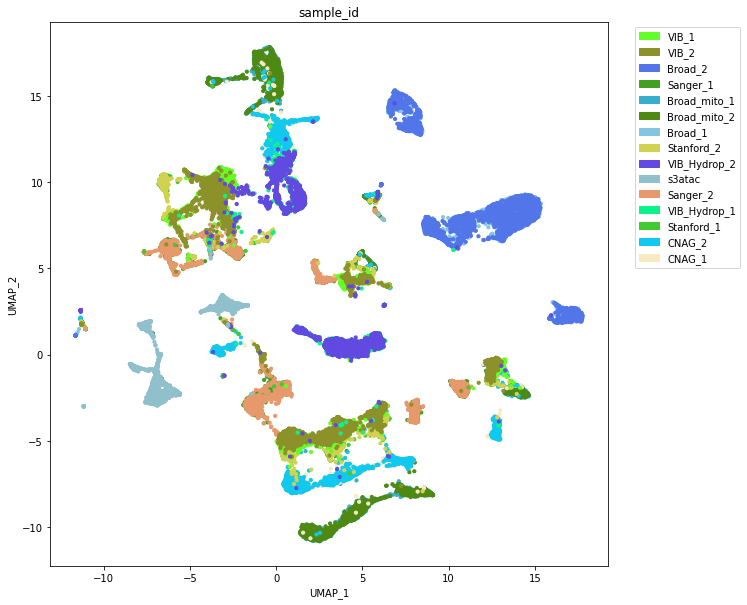

In [24]:
print("UMAP without batch effect correction")
plot_metadata(cistopic_obj_dict['full_merged'],
              reduction_name='UMAP',
              variables=['sample_id'],
              target='cell',
              show_legend=True,
              show_label=False,
              num_columns=1,
              text_size=16,
              dot_size=10,
              figsize=(10,10),
             )

UMAP with batch effect correction


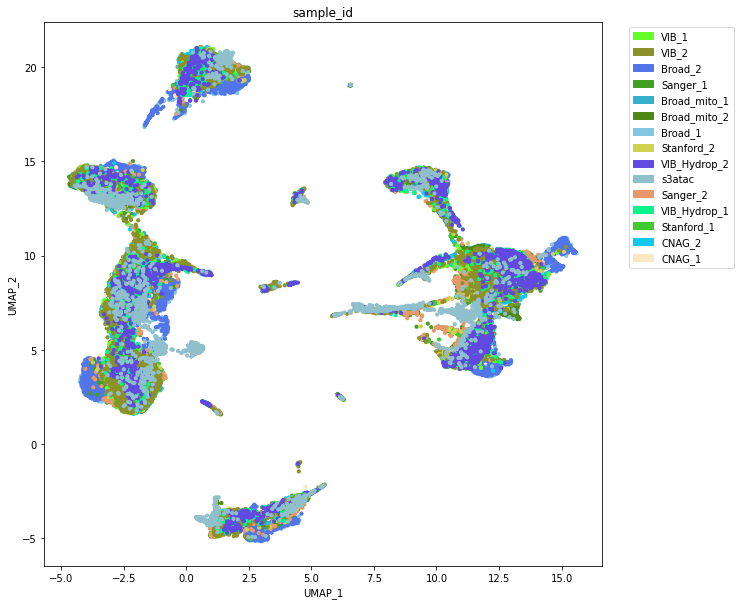

In [25]:
print("UMAP with batch effect correction")
plot_metadata(cistopic_obj_dict['full_merged'],
              reduction_name='UMAP_harmony',
              variables=['sample_id'],
              target='cell',
              show_legend=True,
              show_label=False,
              num_columns=1,
              text_size=16,
              dot_size=10,
              figsize=(10,10),
             )

UMAP with batch effect correction


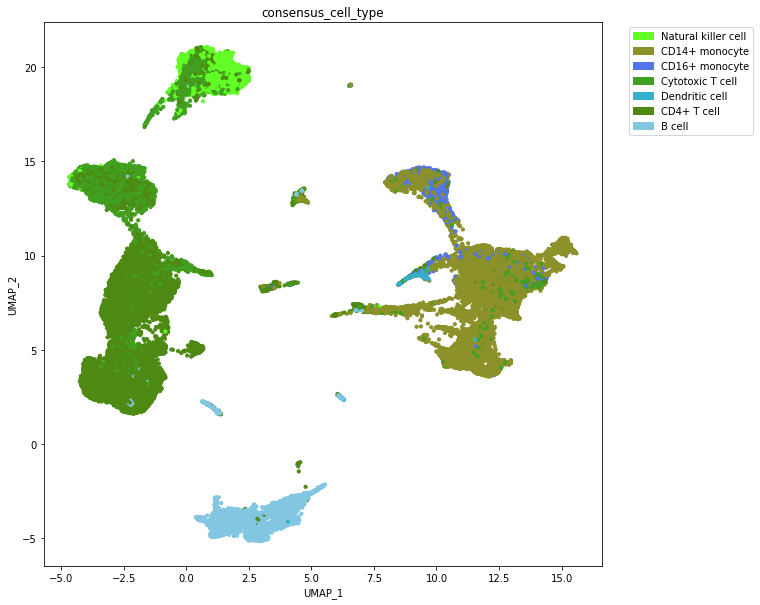

In [26]:
print("UMAP with batch effect correction")
plot_metadata(cistopic_obj_dict['full_merged'],
              reduction_name='UMAP_harmony',
              variables=['consensus_cell_type'],
              target='cell',
              show_legend=True,
              show_label=False,
              num_columns=1,
              text_size=16,
              dot_size=10,
              figsize=(10,10),
             )

# save cto

In [27]:
key_list = ['full_merged']
for key in key_list:
    f_out = os.path.join(wdir, f_cto_dir, key + '__cistopic_obj_filtered_models_annotated.pkl')
    if os.path.isfile(f_out):
        print(f"Skipping {key}, already exists")
        continue
    with open(f_out, 'wb') as f:
        pickle.dump(cistopic_obj_dict[key], f)
    
    print(f"Generated and saved filtered cistopic object for {key}")

Skipping full_merged, already exists


## Export pseudobulk profiles

In [28]:
from pycisTopic.pseudobulk_peak_calling import export_pseudobulk, peak_calling
import pyranges as pr
import requests

In [29]:
# get chromosome sizes (hg38)
target_url = 'http://hgdownload.cse.ucsc.edu/goldenPath/hg38/bigZips/hg38.chrom.sizes'
chromsizes = pd.read_csv(target_url, sep='\t', header=None)
chromsizes.columns = ['Chromosome', 'End']
chromsizes['Start'] = [0]*chromsizes.shape[0]
chromsizes = chromsizes.loc[:,['Chromosome', 'Start', 'End']]
chromsizes = pr.PyRanges(chromsizes)
chromsizes

,Chromosome,Start,End
0,chr1,0,248956422
1,chr1_GL383518v1_alt,0,182439
2,chr1_GL383519v1_alt,0,110268
3,chr1_GL383520v2_alt,0,366580
4,chr1_KI270706v1_random,0,175055
...,...,...,...
450,chrX_KI270880v1_alt,0,284869
451,chrX_KI270881v1_alt,0,144206
452,chrX_KI270913v1_alt,0,274009
453,chrY,0,57227415


In [30]:
f_pseudo_dir = 'consensus_peak_calling'
if not os.path.exists(os.path.join(wdir, f_pseudo_dir)):
    os.makedirs(os.path.join(wdir, f_pseudo_dir))

# First, generate pseudobulk profiles

In [31]:
import ray
ray.shutdown()

In [32]:
bw_paths_dict = {}
bed_paths_dict = {}
for key in cistopic_obj_dict.keys():
    print(f"Starting {key}")
    f_dir = os.path.join(wdir, 'pycistopic_screen', f_pseudo_dir, key)
    if not os.path.exists(f_dir):
        os.makedirs(f_dir)
    
    bw_paths, bed_paths = export_pseudobulk(
                #input_data = cistopic_obj_dict['merged'].cell_data,
                input_data = cistopic_obj_dict[key],
                variable = 'consensus_cell_type',
                sample_id_col = 'sample_id',
                chromsizes = chromsizes,
                bed_path = os.path.join(f_dir, 'pseudobulk_bed_files'),
                bigwig_path =  os.path.join(f_dir, 'pseudobulk_bw_files'),
                #path_to_fragments = fr_dict, # instead read the paths to fragments embedded within the cto
                n_cpu = 24,
                normalize_bigwig = True,
                remove_duplicates = True,
                )
    bw_paths_dict[key] = bw_paths.copy()
    bed_paths_dict[key] = bed_paths.copy()
#     if ray.is_initialized():
#         print("Shutting down Ray")
#         ray.shutdown()

Starting full_merged
2021-11-09 12:14:42,209 cisTopic     INFO     Reading fragments from /staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_preprocess/multiplet_tagged/fragments/Broad_1.sinto.mm.fragments.tsv.gz
2021-11-09 12:16:52,540 cisTopic     INFO     Reading fragments from /staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_preprocess/multiplet_tagged/fragments/Broad_2.sinto.mm.fragments.tsv.gz
2021-11-09 12:18:59,256 cisTopic     INFO     Reading fragments from /staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_preprocess/multiplet_tagged/fragments/Broad_mito_1.sinto.mm.fragments.tsv.gz
2021-11-09 12:20:01,166 cisTopic     INFO     Reading fragments from /staging/leuven/stg_00002/lcb/cflerin/analysis/pbmc_atac/analysis2/data_freeze_Jun2021/atac_preprocess/multiplet_tagged/fragments/Broad_mito_2.sinto.mm.fragments.tsv.gz
2021-11-09 12:21:08,265 cisTopic     

2021-11-09 13:07:09,400	INFO services.py:1263 -- View the Ray dashboard at http://127.0.0.1:8265


(pid=14670) 2021-11-09 13:07:38,059 cisTopic     INFO     Creating pseudobulk for Bcell
(pid=14686) 2021-11-09 13:07:49,767 cisTopic     INFO     Creating pseudobulk for CD14_monocyte
(pid=14678) 2021-11-09 13:08:00,039 cisTopic     INFO     Creating pseudobulk for CD16_monocyte
(pid=14678) 2021-11-09 13:16:20,134 cisTopic     INFO     CD16_monocyte done!
(pid=14678) 2021-11-09 13:16:22,599 cisTopic     INFO     Creating pseudobulk for CD4_Tcell
(pid=14670) 2021-11-09 13:33:50,171 cisTopic     INFO     Bcell done!
(pid=14670) 2021-11-09 13:33:53,115 cisTopic     INFO     Creating pseudobulk for CytotoxicTcell
(pid=14670) 2021-11-09 13:57:21,258 cisTopic     INFO     CytotoxicTcell done!
(pid=14670) 2021-11-09 13:57:23,806 cisTopic     INFO     Creating pseudobulk for Dendriticcell
(pid=14670) 2021-11-09 14:00:16,438 cisTopic     INFO     Dendriticcell done!
(pid=14670) 2021-11-09 14:00:18,703 cisTopic     INFO     Creating pseudobulk for Naturalkillercell
(pid=14670) 2021-11-09 14:20:2

### Derive the consensus cell-type specific peaks
using bed files generated earlier

In [33]:
bed_paths_dict

{'full_merged': {'Bcell': '/user/leuven/330/vsc33042/fderop/data/20211027_hca_benchmark_full_merged/consensus_peak_calling/full_merged/pseudobulk_bed_files/Bcell.bed.gz',
  'CD14_monocyte': '/user/leuven/330/vsc33042/fderop/data/20211027_hca_benchmark_full_merged/consensus_peak_calling/full_merged/pseudobulk_bed_files/CD14_monocyte.bed.gz',
  'CD16_monocyte': '/user/leuven/330/vsc33042/fderop/data/20211027_hca_benchmark_full_merged/consensus_peak_calling/full_merged/pseudobulk_bed_files/CD16_monocyte.bed.gz',
  'CD4_Tcell': '/user/leuven/330/vsc33042/fderop/data/20211027_hca_benchmark_full_merged/consensus_peak_calling/full_merged/pseudobulk_bed_files/CD4_Tcell.bed.gz',
  'CytotoxicTcell': '/user/leuven/330/vsc33042/fderop/data/20211027_hca_benchmark_full_merged/consensus_peak_calling/full_merged/pseudobulk_bed_files/CytotoxicTcell.bed.gz',
  'Dendriticcell': '/user/leuven/330/vsc33042/fderop/data/20211027_hca_benchmark_full_merged/consensus_peak_calling/full_merged/pseudobulk_bed_file

In [34]:
import glob

In [35]:
glob.glob('pycistopic_screen/consensus_peak_calling/full_merged/pseudobulk_bed_files/*')

['consensus_peak_calling/full_merged/pseudobulk_bed_files/CytotoxicTcell.bed.gz',
 'consensus_peak_calling/full_merged/pseudobulk_bed_files/Bcell.bed.gz',
 'consensus_peak_calling/full_merged/pseudobulk_bed_files/Dendriticcell.bed.gz',
 'consensus_peak_calling/full_merged/pseudobulk_bed_files/CD4_Tcell.bed.gz',
 'consensus_peak_calling/full_merged/pseudobulk_bed_files/Naturalkillercell.bed.gz',
 'consensus_peak_calling/full_merged/pseudobulk_bed_files/CD16_monocyte.bed.gz',
 'consensus_peak_calling/full_merged/pseudobulk_bed_files/CD14_monocyte.bed.gz']

In [36]:
narrow_peaks_dict = {}

for key in cistopic_obj_dict.keys():
    print(f"Starting {key}")
    f_dir = os.path.join(wdir, f_pseudo_dir, key, 'macs2')
    if not os.path.exists(f_dir):
        os.makedirs(f_dir)

    # Run peak calling
    narrow_peaks_dict[key] = peak_calling('macs2',
                                     bed_paths_dict[key],
                                     f_dir,
                                     genome_size='hs',
                                     n_cpu=24,
                                     input_format='BEDPE',
                                     shift=73, 
                                     ext_size=146,
                                     keep_dup = 'all',
                                     q_value = 0.05,
                                     )

Starting full_merged


2021-11-09 14:43:58,133	INFO services.py:1263 -- View the Ray dashboard at http://127.0.0.1:8265


(pid=12535) 2021-11-09 14:44:09,849 cisTopic     INFO     Calling peaks for Dendriticcell with macs2 callpeak --treatment /user/leuven/330/vsc33042/fderop/data/20211027_hca_benchmark_full_merged/consensus_peak_calling/full_merged/pseudobulk_bed_files/Dendriticcell.bed.gz --name Dendriticcell  --outdir /user/leuven/330/vsc33042/fderop/data/20211027_hca_benchmark_full_merged/consensus_peak_calling/full_merged/macs2 --format BEDPE --gsize hs --qvalue 0.05 --nomodel --shift 73 --extsize 146 --keep-dup all --call-summits --nolambda
(pid=12543) 2021-11-09 14:44:10,453 cisTopic     INFO     Calling peaks for CD4_Tcell with macs2 callpeak --treatment /user/leuven/330/vsc33042/fderop/data/20211027_hca_benchmark_full_merged/consensus_peak_calling/full_merged/pseudobulk_bed_files/CD4_Tcell.bed.gz --name CD4_Tcell  --outdir /user/leuven/330/vsc33042/fderop/data/20211027_hca_benchmark_full_merged/consensus_peak_calling/full_merged/macs2 --format BEDPE --gsize hs --qvalue 0.05 --nomodel --shift 73 -

### Derive the consensus peaks
make a consensus from the consensus cell-type specific peaks

In [37]:
from pycisTopic.iterative_peak_calling import get_consensus_peaks

In [38]:
#path_to_regions = '/staging/leuven/stg_00002/lcb/cbravo/SCREEN_ENCODE3/V2.hg38-rDHS-Unfiltered.blacklisted.bed'
path_to_blacklist = 'hg38_regions/hg38-blacklist.v2.bed'

In [39]:
peak_half_width = 250

# Get consensus peaks
consensus_peaks_dict = {}
for key in cistopic_obj_dict.keys():
    print(f"Starting {key}")
    f_dir = os.path.join(wdir, f_pseudo_dir, key)
    if not os.path.exists(f_dir):
        os.makedirs(f_dir)
        
    consensus_peaks_dict[key] = get_consensus_peaks(
        narrow_peaks_dict[key],
        peak_half_width,
        chromsizes = chromsizes,
        path_to_blacklist = path_to_blacklist
    )
    consensus_peaks_dict[key].to_bed(
        path=os.path.join(f_dir, key + '__consensus_regions.bed'),
        keep=True,
        compression='infer',
        chain=False
    )

Starting full_merged
2021-11-09 15:05:28,647 cisTopic     INFO     Extending and merging peaks per class
2021-11-09 15:10:04,651 cisTopic     INFO     Normalizing peak scores
2021-11-09 15:10:05,507 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2021-11-09 15:13:45,340 cisTopic     INFO     Done!
